In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams['font.size'] = 18

### Load and format data

In [3]:
genre_values = pd.read_json("genre_averages_all.json")

In [4]:
genre_values = genre_values.transpose()

In [5]:
column_names = ['energy', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 
                'danceability', 'loudness', 'valence', 'popularity']

genre_values = genre_values.rename(columns={i : col_name for i, col_name in enumerate(column_names)})

### Plot the data

In [6]:
def plot_axes(axis_1, axis_2, scale=1, highlight_points=None):
    """
    Parameters
    ----------
    axis_1 : str
        A column in the data to plot along the x-axis
    axis_2 : str
        A column in the data to plot along the y-axis
    scale : float, optional
        How much to scale each axis by before plotting
    highlight_points : iterable of str, optional
        An iterable object of strings representing genres (rows) to highlight on the plot
    """
    fig, axs = plt.subplots(figsize=[10, 10])
    axs.scatter(scale * genre_values[axis_1], scale * genre_values[axis_2], 
                color='k', label="", alpha=0.4)
    
    if highlight_points is not None:
        for i, highlight_point in enumerate(highlight_points):
            axs.scatter(scale * genre_values.loc[highlight_point][axis_1], 
                        scale * genre_values.loc[highlight_point][axis_2],
                        color=f"C{int(i % 10)}", s=100, label=highlight_point)
    
    axs.set_xlabel(axis_1)
    axs.set_ylabel(axis_2)
    plt.legend()
    plt.show()

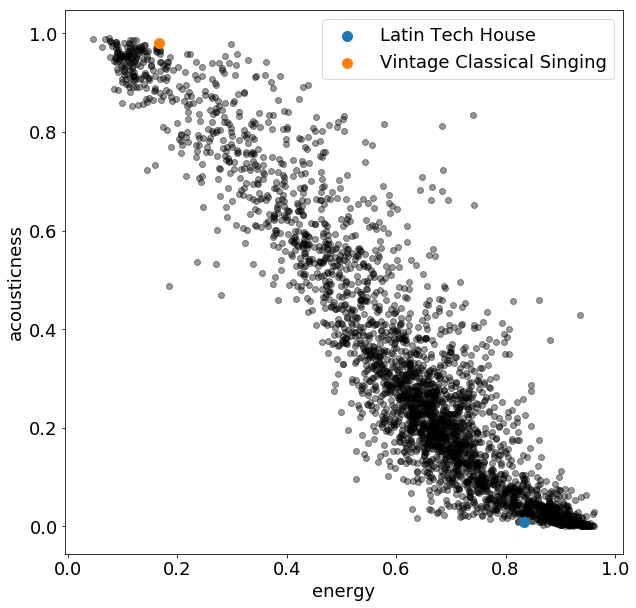

In [7]:
plot_axes("energy", "acousticness", highlight_points=["Latin Tech House", "Vintage Classical Singing"])

### Show extreme genres


In [8]:
genre_values.sort_values(by=["energy"], ascending=False).head()

,energy,liveness,speechiness,acousticness,instrumentalness,danceability,loudness,valence,popularity
Melodic Metalcore,0.962370,0.267097,0.132774,0.001128,0.103352,0.399190,-4.095540,0.272540,43.420000
Hardtechno,0.961370,0.284845,0.186304,0.028474,0.714405,0.610720,-5.425260,0.239426,2.350000
Brazilian Death Metal,0.960380,0.230502,0.138224,0.003207,0.403049,0.323378,-4.940690,0.187563,7.630000
Eurobeat,0.959732,0.233658,0.063106,0.024716,0.043121,0.499392,-4.640557,0.694598,23.546392
Brutal Death Metal,0.957840,0.253335,0.147819,0.001523,0.574725,0.322939,-5.282230,0.193564,27.300000


In [9]:
genre_values.sort_values(by=["acousticness"], ascending=False).head()

,energy,liveness,speechiness,acousticness,instrumentalness,danceability,loudness,valence,popularity
Wind Quintet,0.075188,0.111847,0.043803,0.99133,0.835071,0.304078,-22.28402,0.149144,1.98
Classical Piano,0.045958,0.102101,0.048093,0.98768,0.889796,0.320210,-27.93879,0.138184,43.72
Pianissimo,0.067802,0.106970,0.055339,0.98761,0.907260,0.431363,-24.94004,0.214591,14.55
Classical Piano Duo,0.125292,0.128967,0.044501,0.98696,0.851995,0.421340,-23.30973,0.201952,5.96
Historic Piano Performance,0.114212,0.153773,0.041871,0.98677,0.833847,0.322850,-23.11197,0.177085,4.69
